#### TEMA: PREVISÃO DA POTABILIDADE DA ÁGUA USANDO MACHINE LEARNING


###### Trabalho de Conclusão de Curso apresentado ao Curso de Especialização em Ciência de Dados e Big Data como requisito parcial à obtenção do título de especialista.



#### Universidade: PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS NÚCLEO DE EDUCAÇÃO A DIST NCIA
#### Curso: Pós-graduação Lato Sensu em Ciência de Dados e Big Data

##### Aluno: Sérgio de Paula dos Passos



#### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

#### Leitura dos datasets

In [2]:
df_agua = pd.read_csv('https://raw.githubusercontent.com/sergiopassos/tcc-puc-minas/main/datasets/water_potability.csv')
df_estacao = pd.read_csv('https://raw.githubusercontent.com/sergiopassos/tcc-puc-minas/main/datasets/stations.csv')

In [3]:
df_agua.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,station_id
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,1
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,2
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,3
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,4
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,5


In [4]:
df_estacao.head(5)

,STATION_ID,STATION_NAME,FULL_STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,COUNTY_NAME
0,1,AMERICAN,American River at Water Treatment Plant,A0714010,38.5596,-121417.00,Sacramento
1,2,CACHE,Cache Slough @ Vallejo P.P,B9D81781448,38.2969,-121748.00,Solano
2,3,LINDSEY,Lindsey Slough @ Hastings Cut,B9D81581462,38263.0000,-121771.00,Solano
3,4,AGDGRAND,Ag Drain on Grand Island,B9V81171369,38.1941,-121617.00,Sacramento
4,5,AGDTYLER,Ag Drain on Tyler Island,B9V80801348,38.1324,-121.58,Sacramento


### Exploração dos dados
#### Quantidade de registros

In [5]:
print(f'Quantidade de registros: \n df_agua: {df_agua.shape}\n df_estacao:{df_estacao.shape}')

Quantidade de registros: 
 df_agua: (3276, 11)
 df_estacao:(3520, 7)


### Quantidade de registros duplicados

In [6]:
print(f'Quantidade de registros duplicados: \n df_agua: {df_agua.duplicated().sum()}\n df_estacao:{df_estacao.duplicated().sum()}\n')

Quantidade de registros duplicados: 
 df_agua: 0
 df_estacao:0



### Quantidade de registros faltantes

In [7]:
print(f'df_agua:\n{df_agua.isna().sum()}\n\n---\n\ndf_estacao:\n{df_estacao.isna().sum()}')

df_agua:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
station_id           0
dtype: int64

---

df_estacao:
STATION_ID            0
STATION_NAME          0
FULL_STATION_NAME     0
STATION_NUMBER        0
LATITUDE             40
LONGITUDE            40
COUNTY_NAME           0
dtype: int64


#### Junção dos dataframes, com drop da coluna duplicada (STATION_ID)

In [8]:
df_full = pd.merge(df_agua, df_estacao, left_on='station_id', right_on='STATION_ID', how='inner').drop('STATION_ID', axis=1)

In [9]:
df_full

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,station_id,STATION_NAME,FULL_STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,COUNTY_NAME
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,1,AMERICAN,American River at Water Treatment Plant,A0714010,38.5596,-121417.00,Sacramento
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,2,CACHE,Cache Slough @ Vallejo P.P,B9D81781448,38.2969,-121748.00,Solano
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,3,LINDSEY,Lindsey Slough @ Hastings Cut,B9D81581462,38263.0000,-121771.00,Solano
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,4,AGDGRAND,Ag Drain on Grand Island,B9V81171369,38.1941,-121617.00,Sacramento
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,5,AGDTYLER,Ag Drain on Tyler Island,B9V80801348,38.1324,-121.58,Sacramento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,3272,ANDERSON RES A CENTE,ANDERSON RES A CENTER,E6R71021373,37.1699,-121623.00,Santa Clara
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1,3273,CALERO RES A DAM,CALERO RES A DAM,E6R71101475,37183.0000,-121793.00,Santa Clara
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1,3274,CALERO RES VAULT,CALERO RES VAULT,E6R71111475,37.1841,-121793.00,Santa Clara
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1,3275,ANDERSON RES N LAS A,ANDERSON RES N LAS AINIMAS C ARM,E6R71131385,37.1883,-121643.00,Santa Clara


In [10]:
df_full['COUNTY_NAME'].unique()

array(['Sacramento', 'Solano', 'San Joaquin', 'Contra Costa', 'Alameda',
       'Yolo', 'Sutter', 'Stanislaus', 'Merced', 'Fresno', 'Inyo', 'Lake',
       'Plumas', 'Sonoma', 'San Bernardino', 'Riverside', 'Los Angeles',
       'Kings', 'Kern', 'Santa Clara', 'Butte', 'Yuba', 'San Benito',
       'Glenn', 'Tehama', 'Nevada', 'Colusa', 'Placer', 'Shasta',
       'Lassen', 'Modoc', 'Oregon', 'Siskiyou', 'Sierra', 'El Dorado',
       'Alpine', 'Napa', 'Amador', 'Calaveras', 'Mariposa', 'Madera',
       'Tuolumne', 'Tulare', 'Santa Cruz', 'San Mateo', 'Monterey',
       'San Luis Obispo', 'Santa Barbara', 'Ventura', 'San Francisco',
       'Marin'], dtype=object)

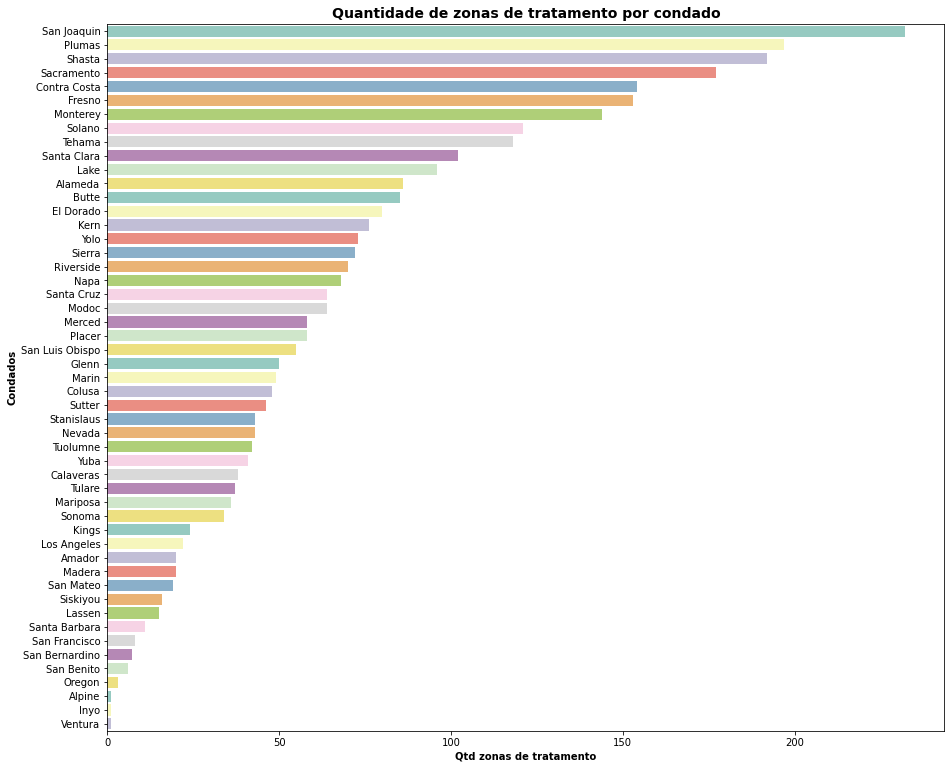

In [11]:
fig, ax = plt.subplots(figsize=(15,13))
sns.countplot(y='COUNTY_NAME', data=df_full, order = df_full['COUNTY_NAME'].value_counts().index, palette='Set3')
plt.title('Quantidade de zonas de tratamento por condado', fontsize=14, fontweight='bold')
ax.set_xlabel('Qtd zonas de tratamento', fontsize=10, fontweight='bold')
ax.set_ylabel('Condados', fontsize=10, fontweight='bold')
plt.show()


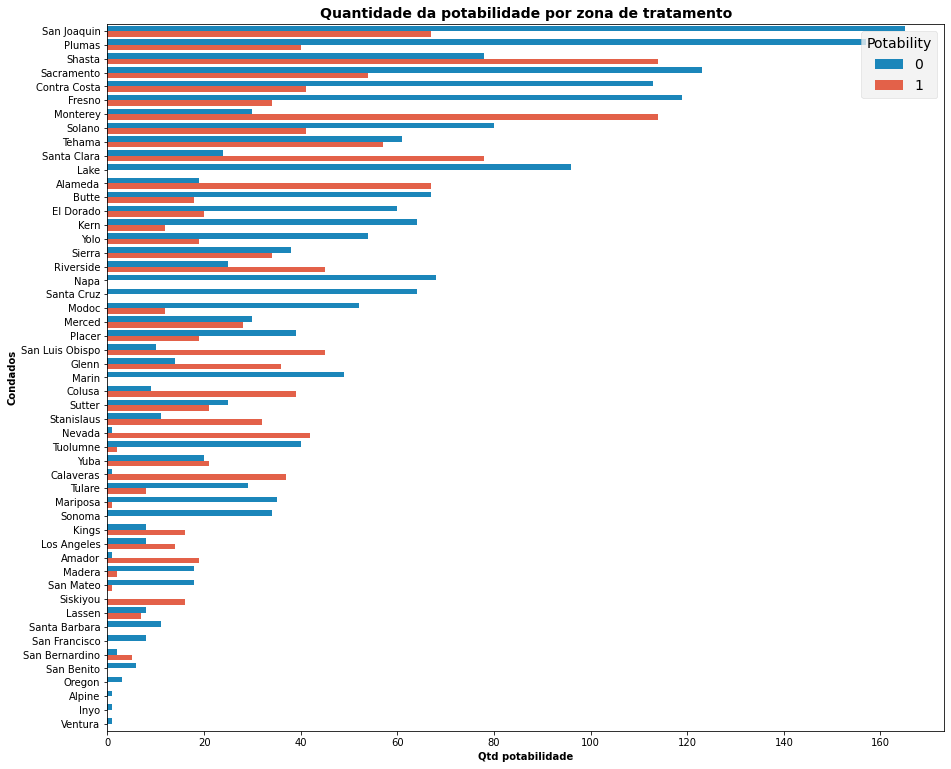

In [12]:
fig, ax = plt.subplots(figsize=(15,13))
style.use('fivethirtyeight')
sns.countplot(y='COUNTY_NAME', data=df_full, order = df_full['COUNTY_NAME'].value_counts().index, hue=df_full['Potability'])
plt.title('Quantidade da potabilidade por zona de tratamento', fontsize=14, fontweight='bold')
ax.set_xlabel('Qtd potabilidade', fontsize=10, fontweight='bold')
ax.set_ylabel('Condados', fontsize=10, fontweight='bold')
plt.show()


#### Verificando dados estatísticos do dataset

In [13]:
df_agua.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


#### Identificando dados ausentes e duplicados

<Figure size 720x432 with 0 Axes>

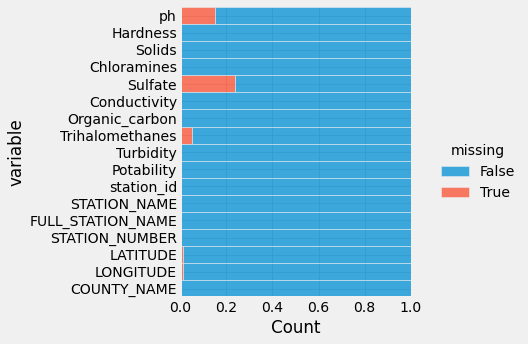

In [14]:
plt.figure(figsize=(10,6))
style.use('fivethirtyeight')
sns.displot(
    data=df_full.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
);

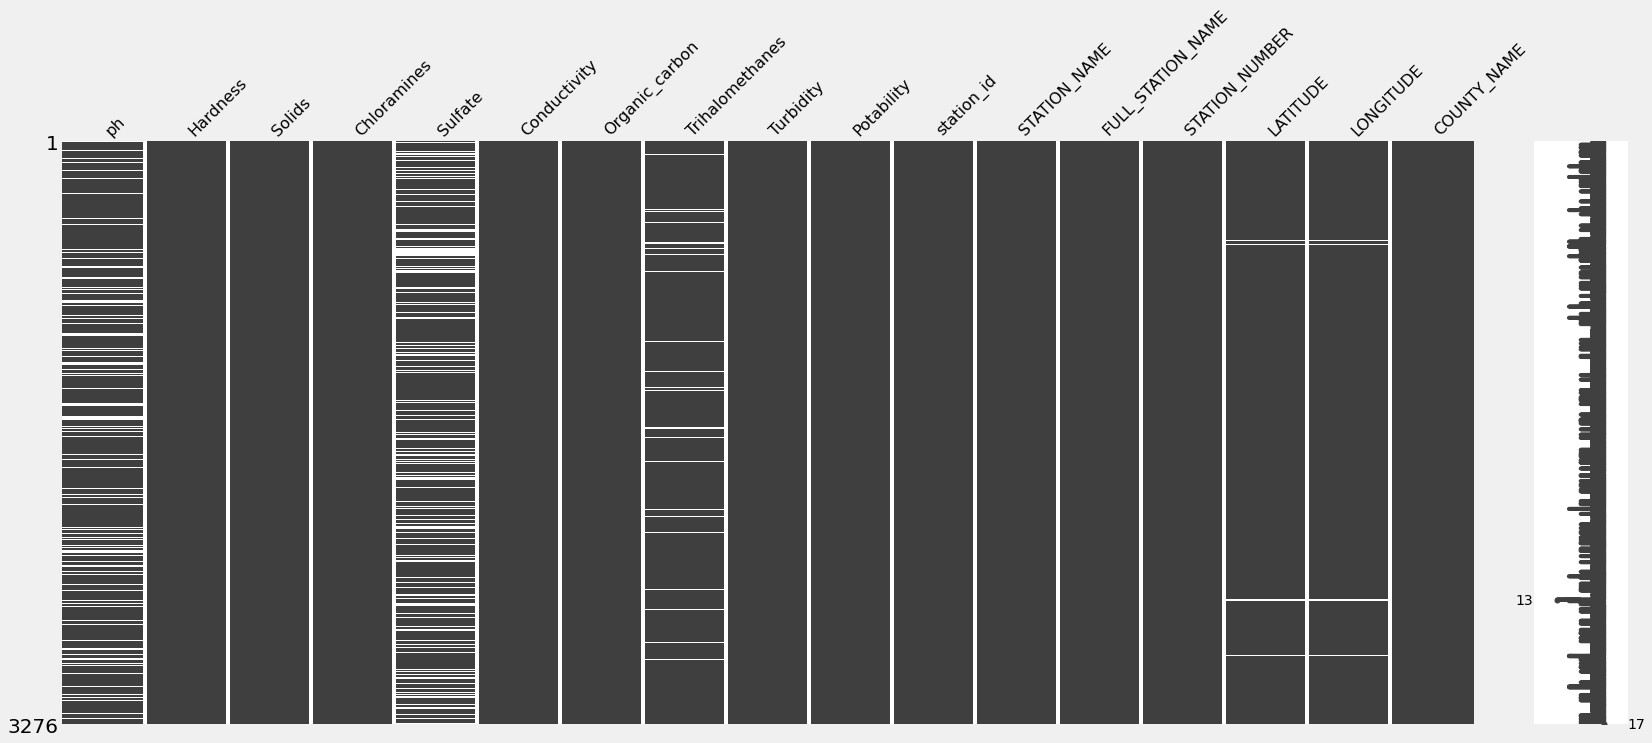

In [15]:
msno.matrix(df_full);

### Substituindo valores das coordenadas por 0

In [16]:
df_full['LATITUDE'] = df_full['LATITUDE'].fillna(0)
df_full['LONGITUDE'] = df_full['LONGITUDE'].fillna(0)

Atribuindo os valores ausentes com o valor médio dessa coluna específica por "Potabilidade". Isso significa que, se houver valor ausente em uma linha e essa linha tiver o valor de "potabilidade" de 1, será imputado o valor médio do grupo nessa coluna específica em que todas as linhas tiverem o valor de "potabilidade" de 1. Se essa linha tiver o valor de "potabilidade" de 0, ela será imputada com o valor médio do grupo nessa coluna específica em que todas as linhas tiverem o valor de "potabilidade" de 0.

In [17]:
df_full.isna().sum()

ph                   491
Hardness               0
Solids                 0
Chloramines            0
Sulfate              781
Conductivity           0
Organic_carbon         0
Trihalomethanes      162
Turbidity              0
Potability             0
station_id             0
STATION_NAME           0
FULL_STATION_NAME      0
STATION_NUMBER         0
LATITUDE               0
LONGITUDE              0
COUNTY_NAME            0
dtype: int64

In [18]:
df_full['ph'] = df_full['ph'].fillna(df_full.groupby(['Potability'])['ph'].transform('mean'))
df_full['Sulfate'] = df_full['Sulfate'].fillna(df_full.groupby(['Potability'])['Sulfate'].transform('mean'))
df_full['Trihalomethanes'] = df_full['Trihalomethanes'].fillna(df_full.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

Copiando dataframe e mantendo os dados numéricos

In [19]:
df = df_full.copy()
df.drop(columns=['station_id', 'STATION_NAME', 'FULL_STATION_NAME', 'STATION_NUMBER',
       'LATITUDE', 'LONGITUDE', 'COUNTY_NAME'], inplace=True)

In [21]:
sns.set()
style.use('fivethirtyeight')

#### Visualização dos dados


Visualizando a Correlação entre as dez variáveis ​​numéricas de valor real usando a visualização pairplot.



*   Azul -> Não potável
*   Orange -> Potável



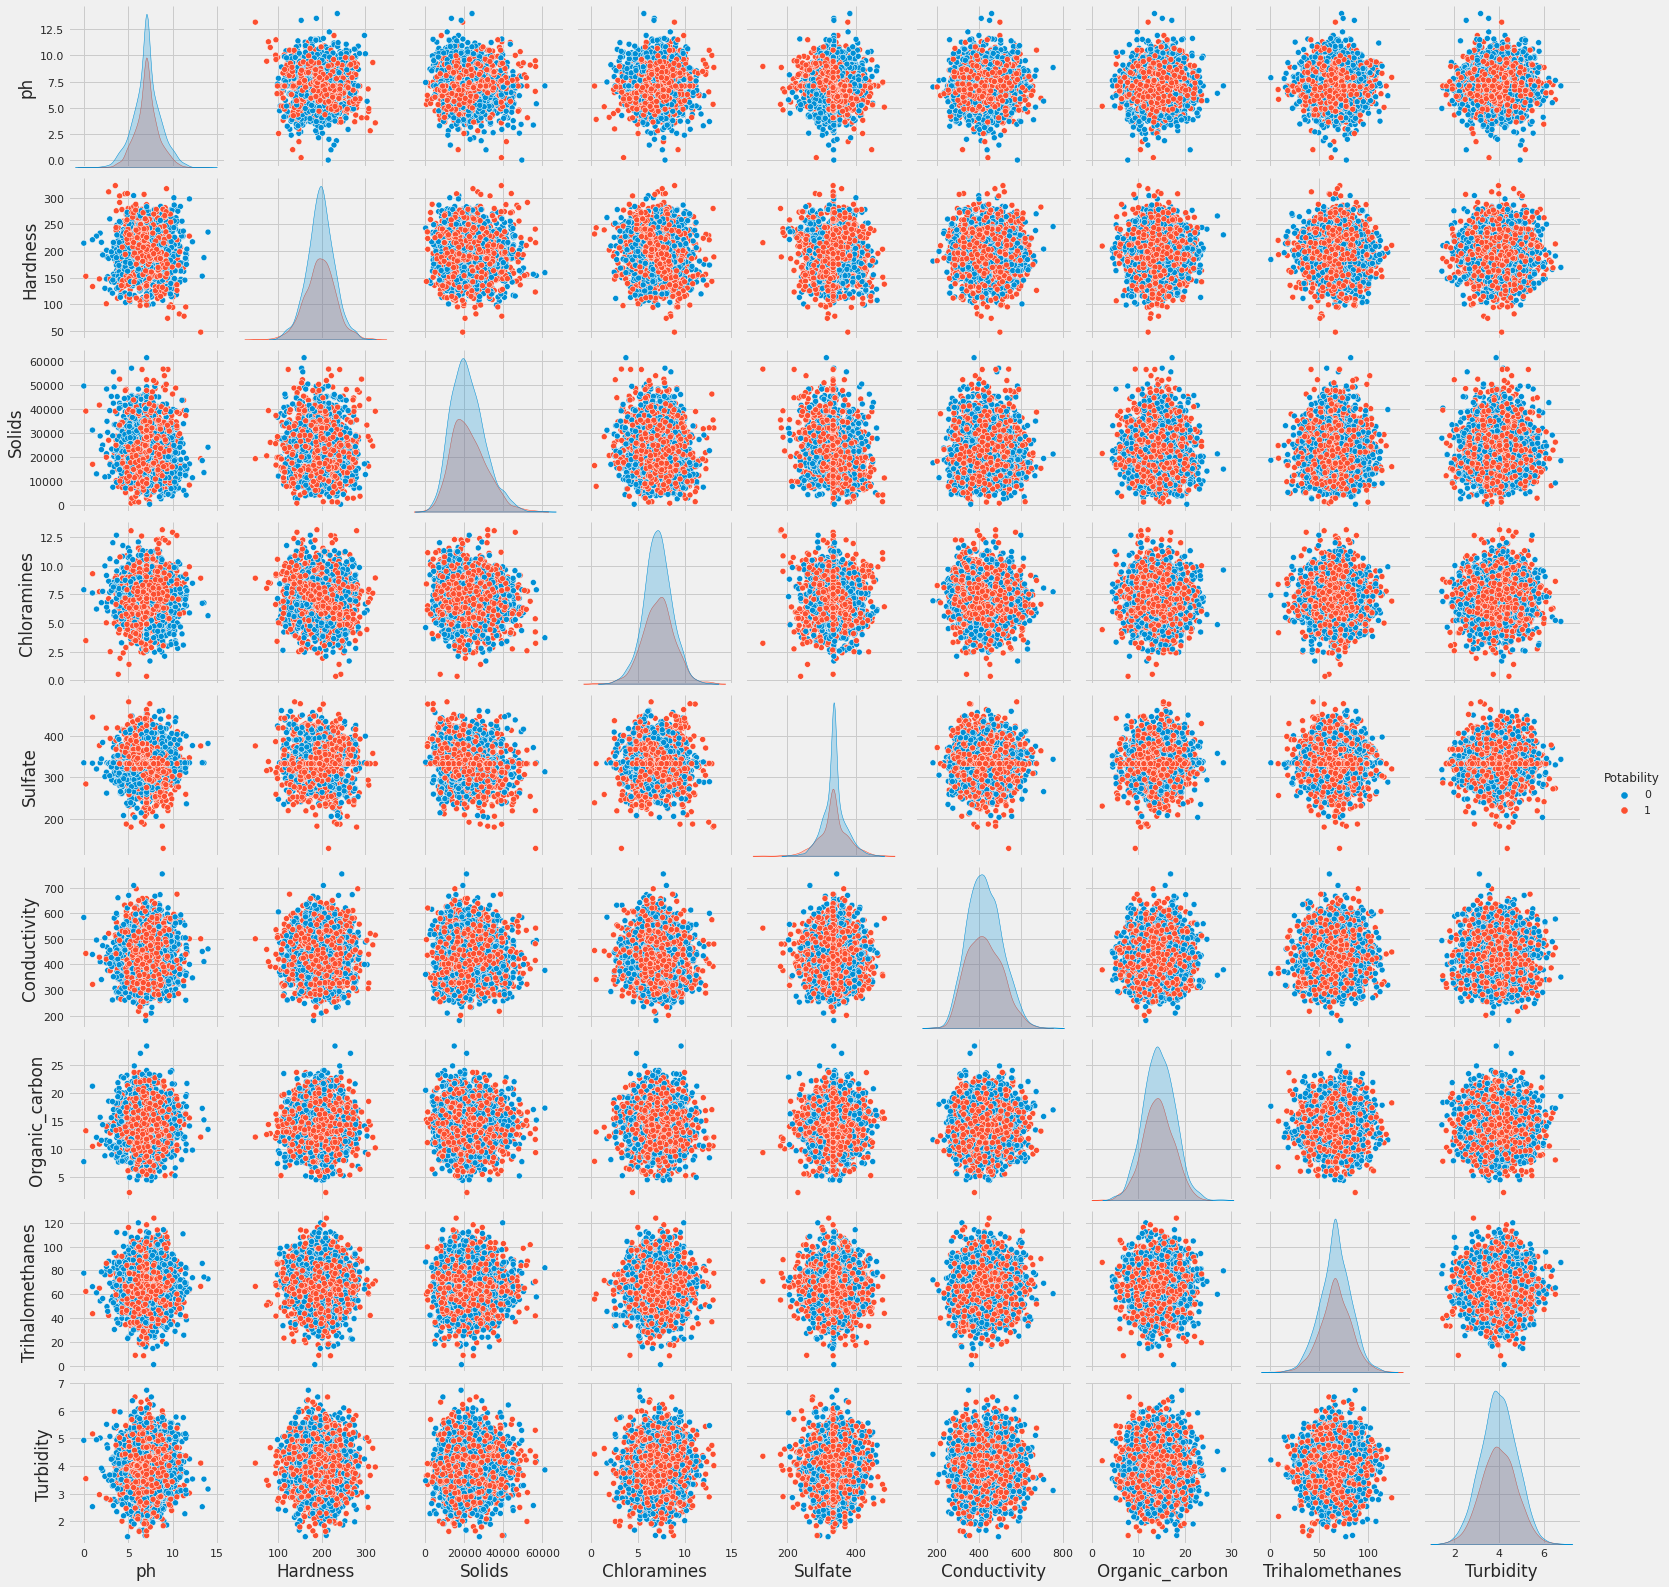

In [22]:
sns.set()
style.use('fivethirtyeight')
sns.pairplot(df, hue='Potability');

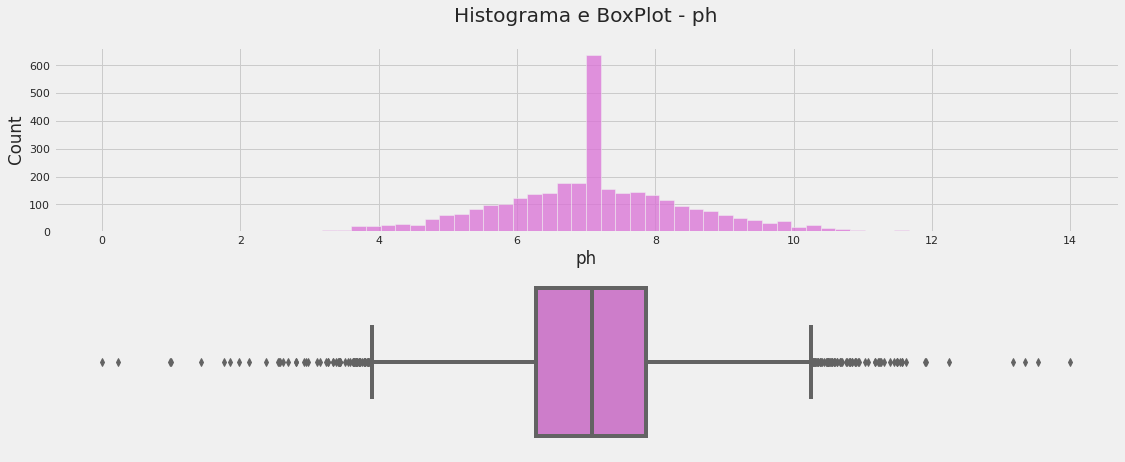

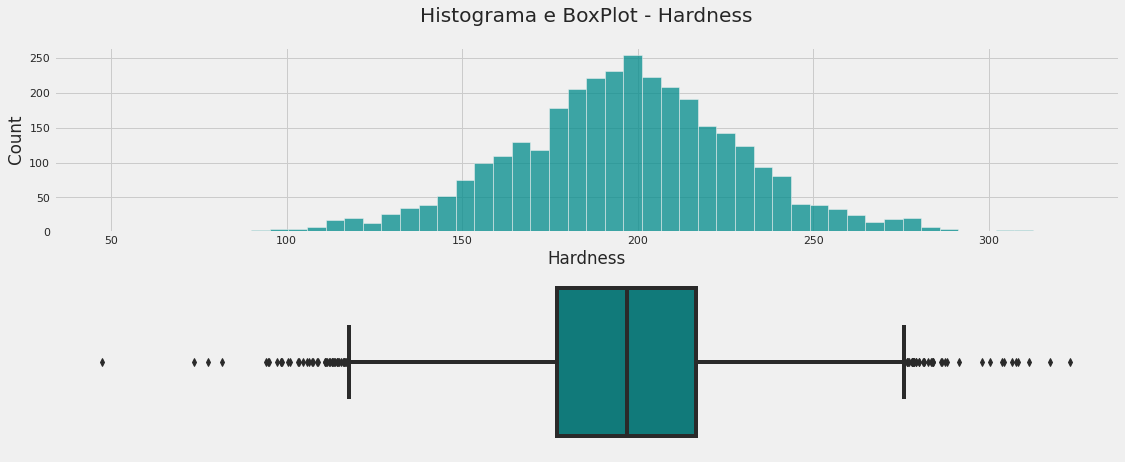

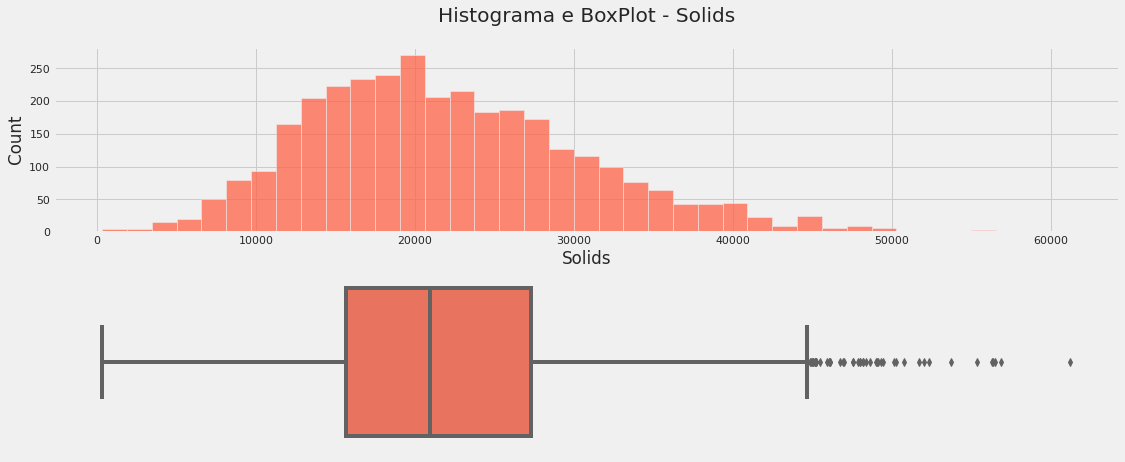

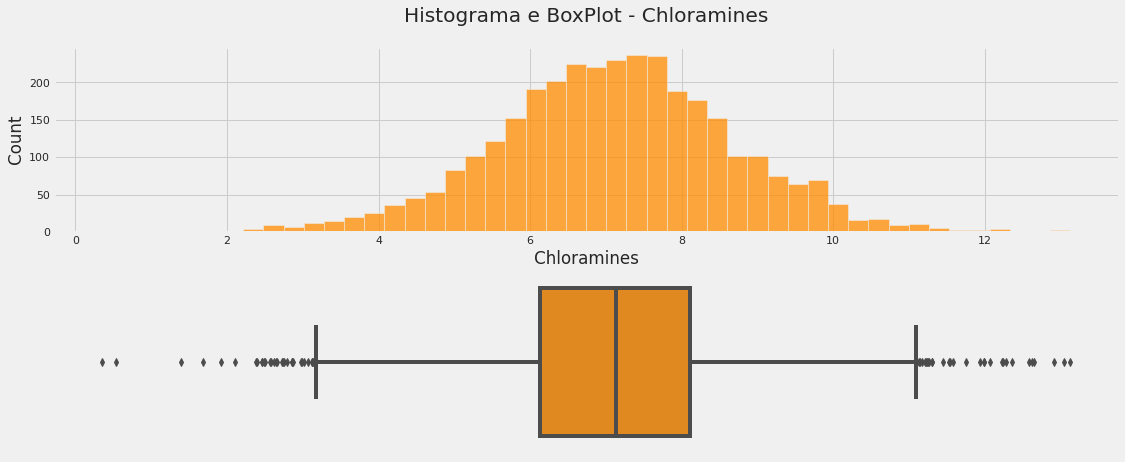

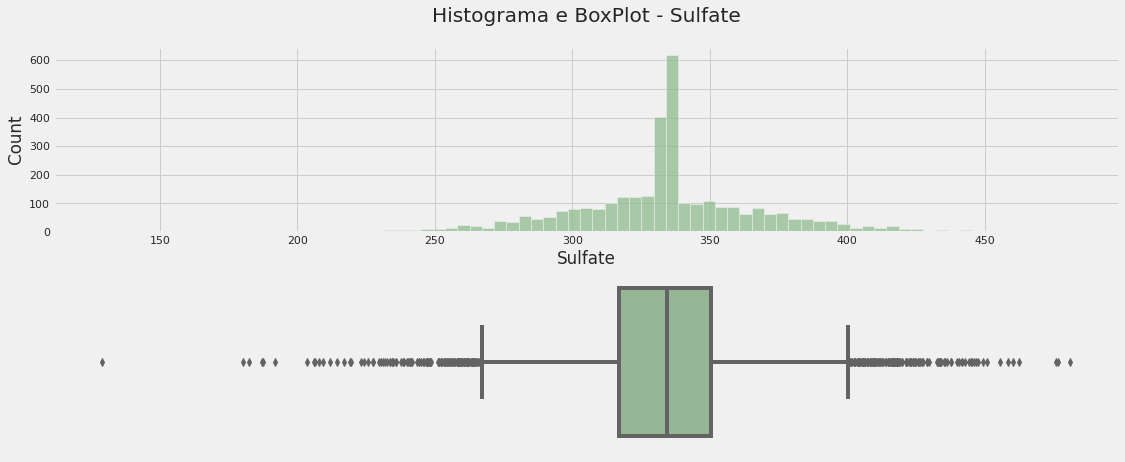

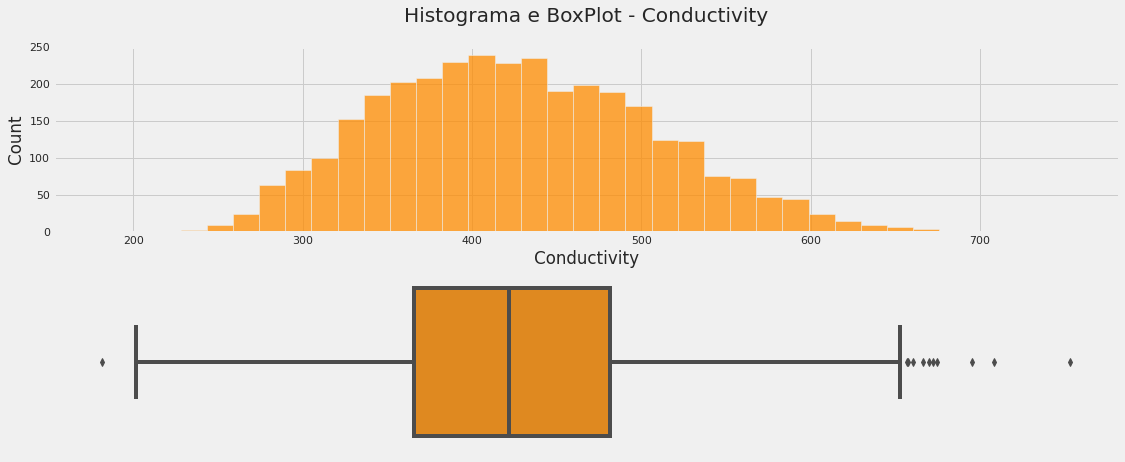

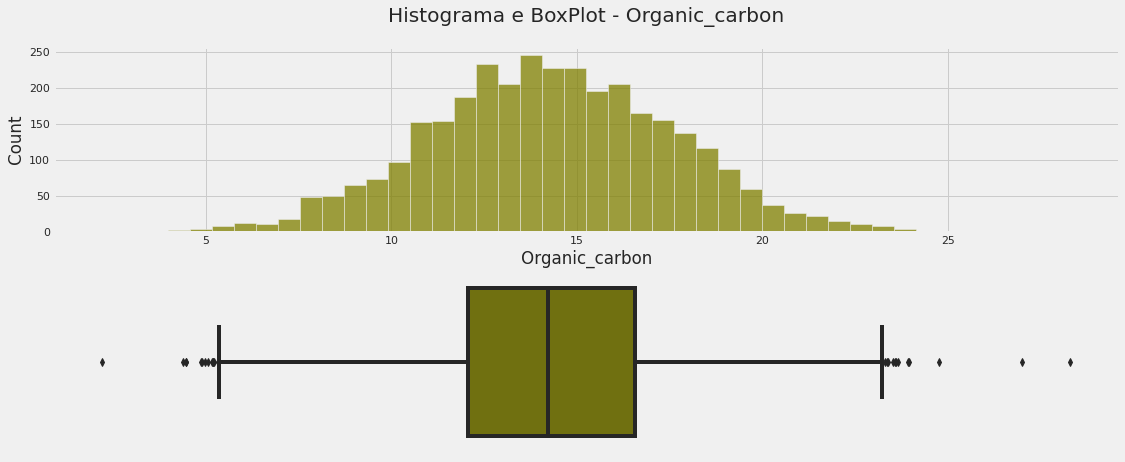

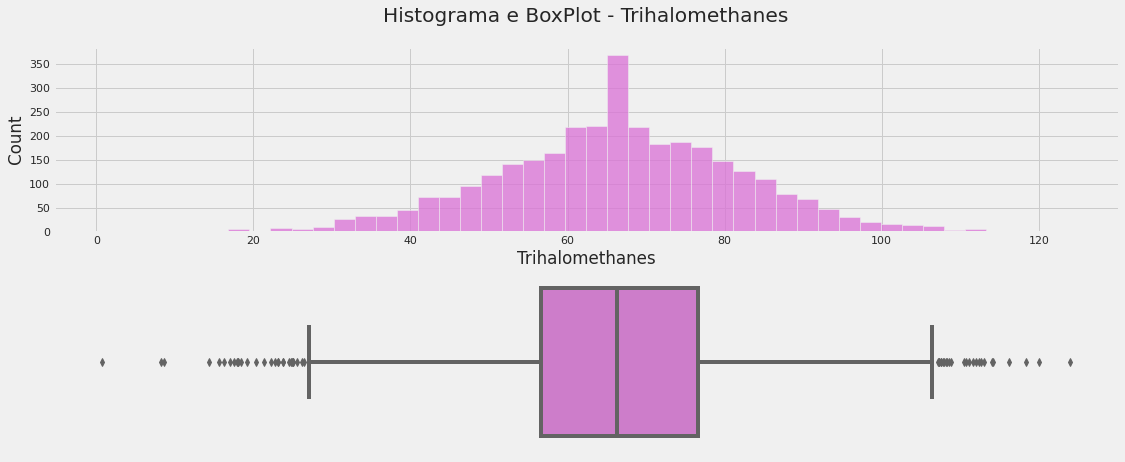

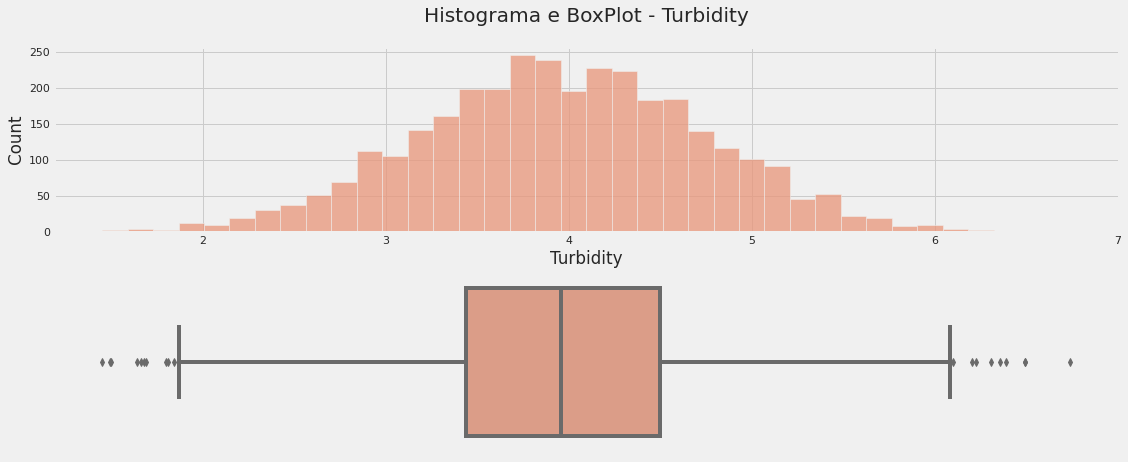

In [23]:
colors = ['darksalmon','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'darkseagreen', 'darkorange',
          'burlywood', 'olive']

def generate_plot(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histograma e BoxPlot - {title}', y=1.1)
    plot1 = sns.histplot(column, ax=ax0, color=color)
    plt.xlabel(ax0.get_xlabel())

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)

for col in df.drop(['Potability'], axis=1).columns:
    generate_plot(df[col], col)

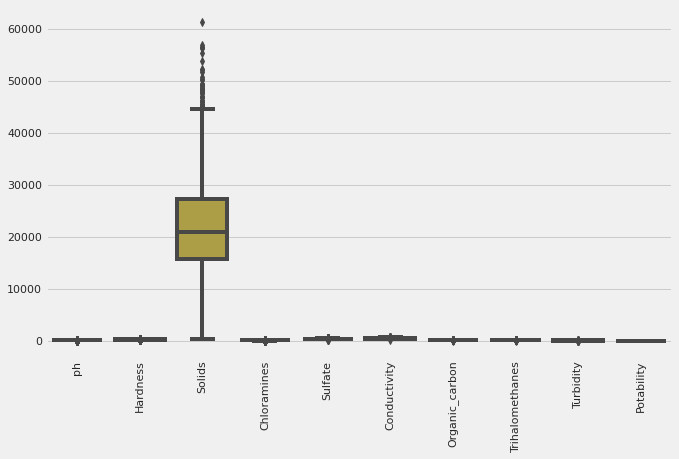

In [24]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df)

In [25]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Processamento dos dados

Padronização das features

In [26]:
X = df.drop('Potability', axis=1)
y = df.Potability

scaler = StandardScaler()
X = scaler.fit_transform(X)

treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, test_size=0.3)

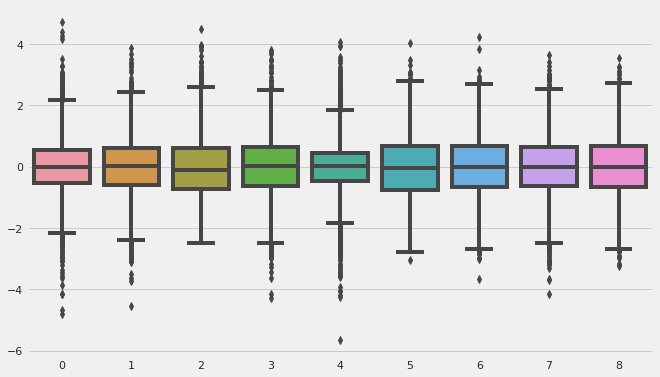

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=X)

Lista de modelos para treinamento



In [28]:
lista_modelos = [("Support Vector Machines", SVC(random_state=21)),              
              ("Decision Tree", DecisionTreeClassifier(random_state=21)),
              ("Logistic Regression", LogisticRegression(random_state=21)), 
              ("Random Forest", RandomForestClassifier(random_state=21)),
              ("Dummy Classifier", DummyClassifier(strategy='most_frequent'))]

In [29]:
metricas = pd.DataFrame(columns=['Modelo', 'Acuracia', 'F1-Score', 'Precision'])

In [30]:
for nome, modelo in lista_modelos:

    modelo.fit(treino_x, treino_y)
    predictions = modelo.predict(teste_x)

    accuracy = f'{accuracy_score(teste_y, predictions):.2f}'
    f1 = f'{f1_score(teste_y, predictions):.2f}'
    precision = f'{precision_score(teste_y, predictions):.2f}'
    new_row = {'Modelo': str(nome), 'Acuracia': float(accuracy), 'F1-Score': float(f1), 'Precision': float(precision)}
    metricas = metricas.append(new_row, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
metricas = metricas.sort_values(by="Acuracia", ascending=False).reset_index(drop=True)

In [32]:
metricas

,Modelo,Acuracia,F1-Score,Precision
0,Random Forest,0.79,0.69,0.75
1,Decision Tree,0.74,0.65,0.64
2,Support Vector Machines,0.67,0.37,0.65
3,Logistic Regression,0.63,0.00,0.00
4,Dummy Classifier,0.63,0.00,0.00


In [33]:
metricas_unpivot = pd.melt(metricas, id_vars='Modelo', var_name='Metrica', value_name='Valor')

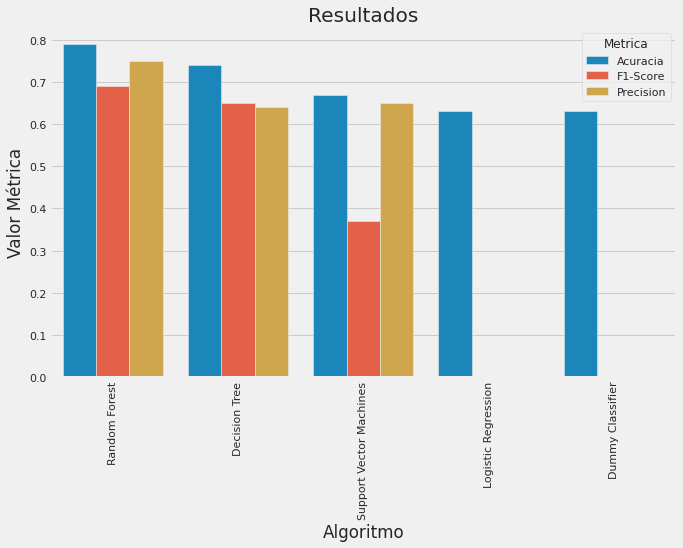

In [34]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
style.use('fivethirtyeight')
plt.title('Resultados')
ax = sns.barplot(x='Modelo', y='Valor', data=metricas_unpivot, hue='Metrica')
plt.ylabel('Valor Métrica')
plt.xlabel('Algoritmo');